F1 score formulation

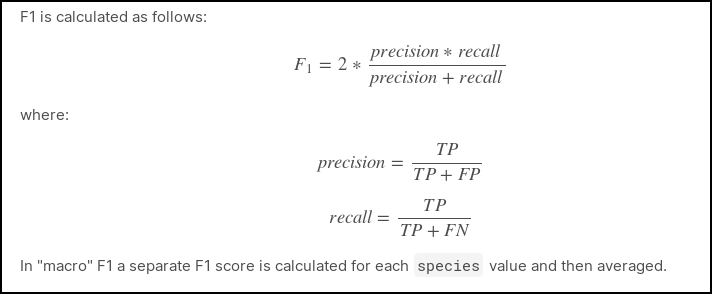

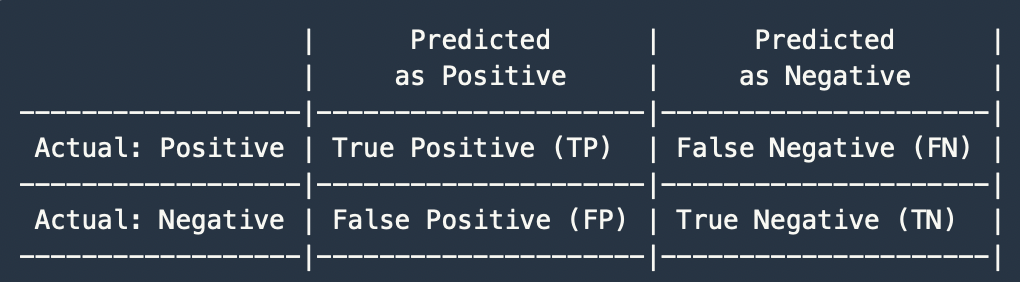

Actually, the above image is confusion matrix

- Precision -> num true positive samples over total num positive samples
- Recall -> num true positive samples over total true samples

In [21]:
import numpy as np
from sklearn.metrics import f1_score,precision_score,recall_score,confusion_matrix,classification_report

#Binary

In [31]:
labels=[0,1]

Only use to get the f1 score for positive label

In [32]:
y_true=np.random.randint(low=0,high=2,size=(100))
y_true

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1])

In [33]:
y_pred=np.random.randint(low=0,high=2,size=(100))
y_pred

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1])

In [34]:
def cal_TP_FP_FN(y_true,y_pred,pos_label=0):
  # shape of y_true: (num_samples,)
  # shape of y_pred: (num_samples,)

  _pos_label=np.where(y_true==pos_label)[0]
  _neg_label=np.where(y_true!=pos_label)[0]
  
  pred_pos_label=np.take(y_pred,_pos_label)
  pred_neg_label=np.take(y_pred,_neg_label)

  TP=np.count_nonzero(pred_pos_label==pos_label)
  FN=len(pred_pos_label)-TP

  TN=np.count_nonzero(pred_neg_label!=pos_label)
  FP=len(pred_neg_label)-TN

  return TP,FP,FN

In [35]:
def cal_precision(TP,FP):
  return TP/(TP+FP)

In [36]:
def cal_recall(TP,FN):
  return TP/(TP+FN)

In [37]:
def cal_f1_score(precision,recall):
  return 2*(precision*recall)/(precision+recall)

In [38]:
TP,FP,FN=cal_TP_FP_FN(y_true,y_pred,pos_label=0)
label_0_precision=cal_precision(TP,FP)
label_0_recall=cal_recall(TP,FN)
label_0_f1_score=cal_f1_score(label_0_precision,label_0_recall)
label_0_f1_score

0.46808510638297873

In [39]:
TP,FP,FN=cal_TP_FP_FN(y_true,y_pred,pos_label=1)
label_1_precision=cal_precision(TP,FP)
label_1_recall=cal_recall(TP,FN)
label_1_f1_score=cal_f1_score(label_1_precision,label_1_recall)
label_1_f1_score

0.5283018867924528

In [40]:
# only use pos_label when average is binary
f1_score(y_true,y_pred,average='binary',pos_label=0)

0.46808510638297873

In [41]:
f1_score(y_true,y_pred,average='binary',pos_label=1)

0.5283018867924528

# Micro

In [45]:
np.unique(y_true)

array([0, 1])

Calculate metrics globally by counting the total true positives, false negatives and false positives.



In [46]:
def cal_micro_f1_score(y_true,y_pred,labels=None):

  if labels==None:
    labels=np.unique(y_true)

  TP_total=0
  FP_total=0
  FN_total=0
  for label in labels:
    TP,FP,FN=cal_TP_FP_FN(y_true,y_pred,pos_label=label)
    TP_total+=TP
    FP_total+=FP
    FN_total+=FN
  micro_precision=cal_precision(TP_total,FP_total)
  micro_recall=cal_precision(TP_total,FN_total)
  micro_f1_score=cal_f1_score(micro_precision,micro_recall)
  return micro_f1_score

In [47]:
cal_micro_f1_score(y_true,y_pred)

0.5

In [48]:
f1_score(y_true,y_pred,average='micro')

0.5

#Macro


Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

Note: did not use when label imbalanced

In [49]:
def cal_macro_f1_score(y_true,y_pred,labels=None):
  if labels==None:
    labels=np.unique(y_true)
    
  macro_f1_score=0
  for label in labels:
    TP,FP,FN=cal_TP_FP_FN(y_true,y_pred,pos_label=label)
    precision=cal_precision(TP,FP)
    recall=cal_recall(TP,FN)
    f1=cal_f1_score(precision,recall)
    macro_f1_score+=f1

  macro_f1_score/=len(labels)
  return macro_f1_score

In [50]:
cal_macro_f1_score(y_true,y_pred)

0.4981934965877158

In [51]:
f1_score(y_true,y_pred,average='macro')

0.4981934965877158

#Weighted

Calculating like macro F1 score but f1 score of each label will multiply with num of samples having its label

In [52]:
def cal_weighted_f1_score(y_true,y_pred,labels=None):
  if labels==None:
    labels=np.unique(y_true)
    
  weighted_f1_score=0
  for label in labels:
    TP,FP,FN=cal_TP_FP_FN(y_true,y_pred,pos_label=label)
    precision=cal_precision(TP,FP)
    recall=cal_recall(TP,FN)
    f1=cal_f1_score(precision,recall)
    weighted_f1_score+=f1*np.count_nonzero(y_true==label)

  return weighted_f1_score/len(y_true)

In [53]:
cal_weighted_f1_score(y_true,y_pred)

0.4987956643918105

In [54]:
f1_score(y_true,y_pred,average='weighted')

0.4987956643918105

#Multi class

Note: can not use average binary for multi class task

In [55]:
y_true=np.random.randint(low=0,high=4,size=(100))
y_true

array([3, 2, 2, 3, 0, 3, 2, 0, 1, 3, 1, 2, 1, 2, 0, 2, 0, 1, 2, 0, 2, 0,
       3, 3, 0, 0, 2, 2, 3, 3, 1, 3, 2, 0, 3, 2, 1, 0, 3, 3, 2, 3, 3, 3,
       2, 2, 2, 0, 1, 0, 2, 2, 0, 3, 0, 3, 1, 1, 0, 1, 3, 0, 3, 3, 3, 1,
       0, 3, 0, 1, 2, 1, 1, 1, 3, 3, 0, 3, 2, 0, 0, 3, 3, 0, 3, 3, 1, 3,
       3, 3, 0, 1, 0, 2, 2, 0, 1, 3, 2, 0])

In [29]:
labels=[0,1,2,3]

In [56]:
y_pred=np.random.randint(low=0,high=4,size=(100))
y_pred

array([3, 0, 1, 1, 1, 1, 2, 3, 1, 3, 3, 3, 3, 3, 1, 0, 0, 1, 3, 1, 2, 2,
       3, 0, 0, 0, 2, 0, 3, 3, 0, 2, 1, 2, 2, 1, 0, 0, 0, 1, 2, 0, 2, 2,
       1, 3, 3, 0, 0, 3, 0, 2, 0, 0, 3, 0, 0, 2, 1, 2, 1, 3, 1, 2, 3, 2,
       2, 3, 2, 3, 3, 0, 2, 2, 2, 2, 3, 0, 1, 2, 2, 1, 3, 3, 2, 2, 0, 1,
       3, 3, 0, 3, 3, 2, 2, 2, 3, 2, 2, 3])

##Micro

In [59]:
cal_micro_f1_score(y_true,y_pred)

0.27

In [60]:
f1_score(y_true,y_pred,average='micro')

0.27

##Macro

In [61]:
cal_macro_f1_score(y_true,y_pred)

0.25532320860987934

In [62]:
f1_score(y_true,y_pred,average='macro')

0.25532320860987934

##Weighted

In [63]:
cal_weighted_f1_score(y_true,y_pred)

0.2701712894530911

In [64]:
f1_score(y_true,y_pred,average='weighted')

0.2701712894530911

#Multi label

Note: convert label to one hot vector

In [89]:
labels=[0,1,2,3]

In [69]:
y_true=np.random.randint(low=0,high=2,size=(10,4))
y_true

array([[1, 0, 0, 0],
       [1, 1, 1, 0],
       [0, 1, 1, 0],
       [1, 0, 1, 0],
       [0, 1, 0, 1],
       [1, 0, 1, 1],
       [1, 1, 1, 0],
       [1, 1, 1, 1],
       [0, 0, 1, 0],
       [1, 0, 0, 1]])

In [70]:
y_pred=np.random.randint(low=0,high=2,size=(10,4))
y_pred

array([[0, 0, 1, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 1],
       [1, 1, 1, 0],
       [0, 1, 0, 1],
       [1, 0, 0, 1],
       [1, 1, 0, 1],
       [1, 1, 0, 1],
       [1, 1, 1, 1],
       [0, 1, 1, 1]])

In [98]:
for label in labels:
  _y_true=y_true[:,label]
  _y_pred=y_pred[:,label]
  TP,FP,FN=cal_TP_FP_FN(_y_true,_y_pred,pos_label=0)
  print(TP,FP,FN)
  TP,FP,FN=cal_TP_FP_FN(_y_true,_y_pred,pos_label=1)
  print(TP,FP,FN)

1 2 2
5 2 2
2 2 3
3 3 2
1 5 2
2 2 5
2 0 4
4 4 0


In [72]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_true, y_pred)

array([[[1, 2],
        [2, 5]],

       [[2, 3],
        [2, 3]],

       [[1, 2],
        [5, 2]],

       [[2, 4],
        [0, 4]]])

In [100]:
(1+5)/(1+5+2)

0.75

In [73]:
print(classification_report(y_true,y_pred,digits=5))

              precision    recall  f1-score   support

           0    0.71429   0.71429   0.71429         7
           1    0.50000   0.60000   0.54545         5
           2    0.50000   0.28571   0.36364         7
           3    0.50000   1.00000   0.66667         4

   micro avg    0.56000   0.60870   0.58333        23
   macro avg    0.55357   0.65000   0.57251        23
weighted avg    0.56522   0.60870   0.56258        23
 samples avg    0.59167   0.59167   0.54238        23



Note: Only take 1 as pos_label

In [106]:
for label in labels:
  _y_true=y_true[:,label]
  _y_pred=y_pred[:,label]
  print(label)
  TP,FP,FN=cal_TP_FP_FN(_y_true,_y_pred,pos_label=1)
  _precision=cal_precision(TP,FP)
  _recall=cal_recall(TP,FN)
  _f1_score=cal_f1_score(_precision,_recall)
  print(_precision,_recall,_f1_score,'\n')

0
0.7142857142857143 0.7142857142857143 0.7142857142857143 

1
0.5 0.6 0.5454545454545454 

2
0.5 0.2857142857142857 0.36363636363636365 

3
0.5 1.0 0.6666666666666666 



In [108]:
for label in labels:
  _y_true=y_true[:,label]
  _y_pred=y_pred[:,label]
  


0
0.7142857142857143 

1
0.5454545454545454 

2
0.36363636363636365 

3
0.6666666666666666 



## Micro

In [112]:
def cal_micro_f1_score_for_multi_label(y_true,y_pred,labels=None):

  if labels==None:
    labels=np.unique(y_true)

  TP_total=0
  FP_total=0
  FN_total=0
  for label in labels:
    _y_true=y_true[:,label]
    _y_pred=y_pred[:,label]
    TP,FP,FN=cal_TP_FP_FN(_y_true,_y_pred,pos_label=1)
    TP_total+=TP
    FP_total+=FP
    FN_total+=FN
  micro_precision=cal_precision(TP_total,FP_total)
  micro_recall=cal_precision(TP_total,FN_total)
  micro_f1_score=cal_f1_score(micro_precision,micro_recall)
  return micro_f1_score

In [113]:
cal_micro_f1_score_for_multi_label(y_true,y_pred,labels=[0,1,2,3])

0.5833333333333334

In [114]:
f1_score(y_true,y_pred,average='micro')

0.5833333333333334

##Macro

In [146]:
def cal_macro_f1_score_for_multi_label(y_true,y_pred,labels=None):
  if labels==None:
    labels=np.unique(y_true)
    
  macro_f1_score=0
  for label in labels:
    _y_true=y_true[:,label]
    _y_pred=y_pred[:,label]
    TP,FP,FN=cal_TP_FP_FN(_y_true,_y_pred,pos_label=1)
    precision=cal_precision(TP,FP)
    recall=cal_recall(TP,FN)
    f1=cal_f1_score(precision,recall)
    macro_f1_score+=f1

  macro_f1_score/=len(labels)
  return macro_f1_score

In [147]:
cal_macro_f1_score_for_multi_label(y_true,y_pred,labels=[0,1,2,3])


0.5725108225108225

In [148]:
f1_score(y_true,y_pred,average='macro')

0.5725108225108225

##Weighted

In [144]:
def cal_weighted_f1_score_for_multi_label(y_true,y_pred,labels=None):
  if labels==None:
    labels=np.unique(y_true)
    
  sample_totals=0
  weighted_f1_score=0
  for label in labels:
    _y_true=y_true[:,label]
    _y_pred=y_pred[:,label]
    TP,FP,FN=cal_TP_FP_FN(_y_true,_y_pred,pos_label=1)
    precision=cal_precision(TP,FP)
    recall=cal_recall(TP,FN)
    f1=cal_f1_score(precision,recall)
    num_samples=np.count_nonzero(_y_true==1)
    sample_totals+=num_samples
    weighted_f1_score+=f1*num_samples

  return weighted_f1_score/sample_totals

In [145]:
cal_weighted_f1_score_for_multi_label(y_true,y_pred,labels=[0,1,2,3])

0.5625823451910408

In [149]:
f1_score(y_true,y_pred,average='weighted')

0.5625823451910408

##Samples

In [156]:
def cal_samples_f1_score_for_multi_label(y_true,y_pred):
  samples_f1_score=0
  for i in range(len(y_true)):
    _y_true=y_true[i,:]
    _y_pred=y_pred[i,:]
    TP,FP,FN=cal_TP_FP_FN(_y_true,_y_pred,pos_label=1)
    precision=cal_precision(TP,FP)
    recall=cal_recall(TP,FN)
    if recall==0 or precision==0:
      f1=0
    else:
      f1=cal_f1_score(precision,recall)
    samples_f1_score+=f1

  return samples_f1_score/len(y_true)

In [157]:
cal_samples_f1_score_for_multi_label(y_true,y_pred)

0.5423809523809524

In [158]:
f1_score(y_true,y_pred,average='samples')

0.5423809523809524